# Neural Network 1

Many concepts are from the book 
> [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/) by Michael Nielsen

A **neural network** is a machine with lots of parameters  
so that when one input a sample (e.g., a picture)  
the machine will output **an** answer (e.g., dog or cat).

For many cases,  
humans are able to make a good program to reach the goal.  
(e.g., input a number and output whether the number is even or odd.)

In many real-life problem,  
such a good program might not easy to implement,  
so we ask the machine to tune the parameters **strategically**.

One of the strategy is the **gradient descent method**.

**Run the next cell first to get required packages**

In [81]:
import numpy as np
import matplotlib.pyplot as plt

## Gradient descent method

[**Gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent) is an algorithm  
to find a local minimum.

![gradient descent from wiki](https://upload.wikimedia.org/wikipedia/commons/7/79/Gradient_descent.png "gradient descent")
(Illustration of gradient descent on a series of level sets.  
Source:  [Wikipedia:  Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent))

The key idea is that  
the gradient points at the direction that locally **increases** the function value,  
so going to the reversed direction will decrease the function value.

Let $f:\mathbb{R}^d\rightarrow\mathbb{R}$ is a differentiable real-value function.  

#### Algorithm (with learning rate $\alpha$)
1. Start with a random point $x$.
2. Compute the gradient $v=\nabla f(x)$
3. Update $x$ as $x-\alpha v$.

In [11]:
def gradient_descent(f, gradf, dim, x=None, steps=10, alpha=1):
    if x==None:
        x = np.random.randn(dim)
        ### x is a list (row vector)
    record = [x.copy()]
    for _ in range(1,steps):
        x = x - alpha * gradf(x)
        record.append(x.copy())
    return record

#### Example
Pick $f(x)=x^2$ and $\nabla f(x)=2x$.  
The gradient descent method should reach $x=0$ gradually.

Try it with `alpha = 1, 0.5, 0.1` to see the difference.

In [23]:
### note that x is a one-dimensional array of length 1
f = lambda x: x[0]**2
gradf = lambda x: 2*x[0]

gradient_descent(f, gradf, dim=1, alpha=0.1)

[array([-0.5260864]),
 array([-0.42086912]),
 array([-0.3366953]),
 array([-0.26935624]),
 array([-0.21548499]),
 array([-0.17238799]),
 array([-0.13791039]),
 array([-0.11032831]),
 array([-0.08826265]),
 array([-0.07061012])]

#### Example
Pick $f(x,y)=x^2+y^2$ and $\nabla f(x,y)=\begin{bmatrix}2x\\2y\end{bmatrix}$.  
The gradient descent method should reach $(x,y)=(0,0)$ gradually.

Try it with `alpha = 1, 0.5, 0.1` to see the difference.

In [29]:
### note that x is a one-dimensional array of length 2
f = lambda x: x[0]**2 + x[1]**2
gradf = lambda x: np.array([2*x[0], 2*x[1]])

gradient_descent(f, gradf, dim=2, alpha=0.1)

[array([ 1.64804953,  0.04191363]),
 array([ 1.31843963,  0.0335309 ]),
 array([ 1.0547517 ,  0.02682472]),
 array([ 0.84380136,  0.02145978]),
 array([ 0.67504109,  0.01716782]),
 array([ 0.54003287,  0.01373426]),
 array([ 0.4320263 ,  0.01098741]),
 array([ 0.34562104,  0.00878992]),
 array([ 0.27649683,  0.00703194]),
 array([ 0.22119746,  0.00562555])]

## Artificial neuron
An [artificial neuron](https://en.wikipedia.org/wiki/Artificial_neuron) mimicks what happened for a biological neuron:  
> a neuron takes several **inputs** and combines them under certain **weights**  
> if the total is more than a **threshold**, then the neuron becomes **activated**.

![neuron](https://upload.wikimedia.org/wikipedia/commons/b/b0/Artificial_neuron.png "neuron")
(An illustration of an artificial neuron  
Source:  [Wikipedia:  Artificial neuron](https://en.wikipedia.org/wiki/Artificial_neuron))

**input**:  a vector $a^0$ in $\mathbb{R}^{d}$ ($x_1,\ldots,x_m$ in the picture)  
**weight**:  a $1\times d$ matrix $W=\begin{bmatrix}w_{0} & \cdots & w_{d-1}\end{bmatrix}$  
**threshold**:  a vector $b$ in $\mathbb{R}^1$  
**activation function**: the sigmoid function $\sigma(x)=\frac{1}{1+e^{-x}}$ ($\varphi$ in the picture)  

In [50]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

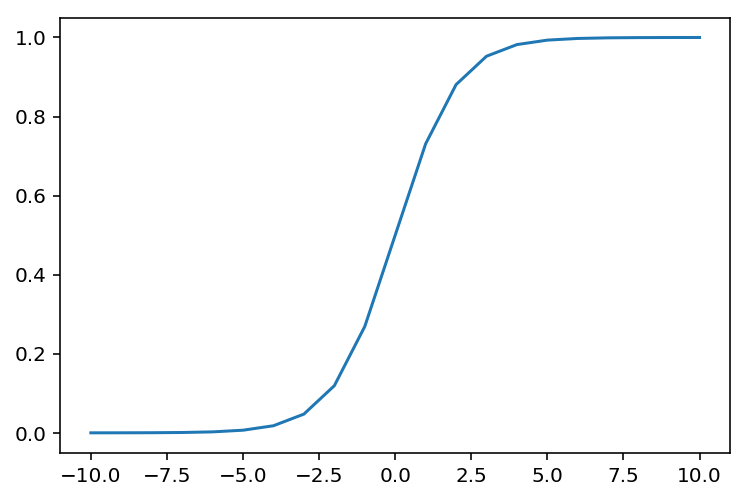

In [51]:
a = np.linspace(-10,10,21)
y = sigmoid(a)
plt.plot(a,y)

**output** $a^1$:
> $z^1 = W a^0 + b$ &nbsp;&nbsp;&nbsp;&nbsp;(F1)  
> $a^1 = \sigma(z^1)$ &nbsp;&nbsp;&nbsp;&nbsp;(F2)

(This process is called **feed forward**.)

Thus, $a^1$ is between $0$ and $1$.  
For example, one may say the answer is yes if $a^1\geq 0.5$  
and no if $a^1<0.5$.

In [114]:
def feedforward(a0, W, b):
    z1 = W @ a0 + b
    a1 = sigmoid(z1)
    return a1, z1

#### Example
Take $W=\begin{bmatrix}1&1\end{bmatrix}$ and $b=\begin{bmatrix}5\end{bmatrix}$.  
Then $a^1\geq 0.5$ if and only if $x+y\geq -5$,  
where the input is $a^0=\begin{bmatrix}x\\y\end{bmatrix}$.

Try $(x,y)=(0,0),(-5,0),(-5,-5),(0,-5)$.

In [115]:
x,y = 0,0

W = np.array([1,1]).reshape(1,2)
b = np.array([5]).reshape(1,1)
a0 = np.array([x,y]).reshape(2,1)

feedforward(a0, W, b)

(array([[ 0.99330715]]), array([[5]]))

#### Example
Let $a^0$ be the vector of pixels of a picture.  
Can you find $W$ and $b$ so that  
$a^1\geq 0.5$ if the picture is a dog, and   
$a^1< 0.5$ if the picture is a cat?

#### Question
How to find appropriate $W$ and $b$?

Suppose we have a data set  
> (x1,y1), ... , (xN,yN),

where $x$'s are the input and $y$'s are the answers (labels).

The goal is to find $W$ and $b$ so that $a^1(x_i)\sim y_i$ for each $i$.

### Cost function

A **cost function** measures the correctness of $W$ and $b$.  

A common cost function is the $\ell_2$ norm:
> $C(W,b) = \frac{1}{N}\cdot \sum_{i} \frac{1}{2}\|a^1(x_i)-y_i\|^2$

When $C(W,b)$ is very small,  
it means $a^1(x_i)\sim y_i$ for each $i$.

In [116]:
def cost(data, W, b):
    N = len(data)
    total_cost = 0
    for x,y in data:
        total_cost += 0.5 * np.sum((feedforward(x, W, b)[0] - y)**2)
    return total_cost/N

#### Example
Let $x_1=\begin{bmatrix}1\\1\end{bmatrix}$ and $y_1=\begin{bmatrix}1\end{bmatrix}$.  
Let $x_2=\begin{bmatrix}-1\\-1\end{bmatrix}$ and $y_1=\begin{bmatrix}0\end{bmatrix}$.

When $W=\begin{bmatrix}1&1\end{bmatrix}$ and $b=\begin{bmatrix}0\end{bmatrix}$.  

The cost is 
> $\frac{1}{2}\left(0.5\|a^1(x_1)-y_1\|^2 + 0.5\|a^1(x_2)-y_2\|^2\right)$.

If you change $W$ to $\begin{bmatrix}-1\\-1\end{bmatrix}$, the cost will increase.

In [118]:
x1 = np.array([1,1]).reshape(2,1)
y1 = np.array([1]).reshape(1,1)

x2 = np.array([-1,-1]).reshape(2,1)
y2 = np.array([0]).reshape(1,1)

data = [(x1,y1), (x2,y2)]

W = np.array([1,1]).reshape(1,2)
b = np.array([0]).reshape(1,1)

cost(data, W, b)

0.0071046683093055271

How to minimize the cost function?  
> _gradient descent!!_

Note: The data are used to create the cost function  
**whose variables are $W$ and $b$.**

#### Algorithm (with learning rate $\alpha$)
1. Start with a random point $(W,b)$.
2. Compute the gradients $\nabla_W C(W,b)$ and $\nabla_b C(W,b)$ by (BP1)--(BP4) below.
3. Update $W$ as $W-\alpha \nabla_W C(W,b)$ and update $b$ as $b-\alpha \nabla_b C(W,b)$.

#### The equations of backpropagation (simplified)
> $\delta^1 = \nabla_{a^1}C \odot \sigma'(z^1)$ &nbsp;&nbsp;&nbsp;&nbsp;(BP1)  
> $\delta^0 = W^\top\delta^1 \odot \sigma'(z^0)$ &nbsp;&nbsp;&nbsp;&nbsp;(BP2)  
> $\nabla_b C = \delta^1$ &nbsp;&nbsp;&nbsp;&nbsp;(BP3)  
> $\nabla_W C = \delta^1 (a^0)^\top$ &nbsp;&nbsp;&nbsp;&nbsp;(BP4)  

Here we let $\delta^\ell=\nabla_{z^\ell}C$.  
Also, $\odot$ means the entrywise product (default product in NumPy).  

#### Example
A dataset with 50 yellow dots and 50 purple dots.  
Yellow dots are labeled by $\begin{bmatrix}1\end{bmatrix}$, and  
purple dots are labeled by $\begin{bmatrix}0\end{bmatrix}$.

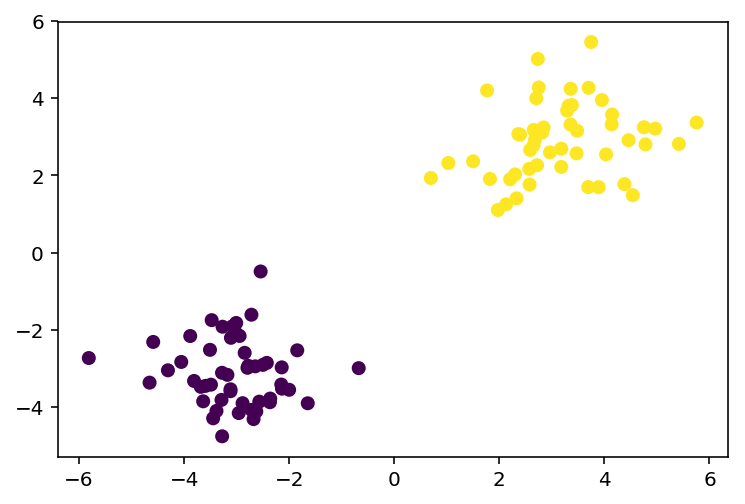

In [154]:
data = [(np.random.randn(2,1)+3,np.ones((1,1))) for _ in range(50)] + [(np.random.randn(2,1)-3,np.zeros((1,1))) for _ in range(50)]

x = [p[0][0][0] for p in data]
y = [p[0][1][0] for p in data]
c = [p[1][0][0] for p in data]
plt.scatter(x,y,c=c,cmap='viridis')

In [119]:
def gradaLC(aL, y):
    """
    Find nabla_aL C
    1/2 * 2 (aL - y)
    """
    return aL - y

def sigmoid_derivative(x):
    return 1 / (1 + np.exp(x)) / (1 + np.exp(-x))

#### The equations of backpropagation (simplified)
> $\delta^1 = \nabla_{a^1}C \odot \sigma'(z^1)$ &nbsp;&nbsp;&nbsp;&nbsp;(BP1)  
> $\delta^0 = W^\top\delta^1 \odot \sigma'(z^0)$ &nbsp;&nbsp;&nbsp;&nbsp;(BP2)  
> $\nabla_b C = \delta^1$ &nbsp;&nbsp;&nbsp;&nbsp;(BP3)  
> $\nabla_W C = \delta^1 (a^0)^\top$ &nbsp;&nbsp;&nbsp;&nbsp;(BP4)  

Examing the equations again.  
(BP1) is used to find $\delta^1$.  
(BP2) is not used for computing $\nabla_bC$ and $\nabla_WC$ here.  
(We will use it for a general neural network.)  
With $\delta^1$, we may find the gradients by (BP3) and (BP4).

In [125]:
def backprop(x, y, W, b):
    """
    Find nabla_W C and nabla_b C
    """
    a0 = x.copy()
    a1, z1 = feedforward(a0, W, b);
    delta1 = gradaLC(a1, y) * sigmoid_derivative(z1) ### (BP1)
    nabla_b = delta1.copy()
    nabla_W = delta1 * a0.T 
    return nabla_W, nabla_b 

In [155]:
data = [(np.random.randn(2,1)+3,np.ones((1,1))) for _ in range(50)] + [(np.random.randn(2,1)-3,np.zeros((1,1))) for _ in range(50)]
x,y = data[0]

W = np.zeros((1,2))
b = np.zeros((1,1))

backprop(x, y, W, b)

(array([[-0.52612692, -0.23835625]]), array([[-0.125]]))

Apply gradient descent to a neuron.  

In [131]:
def neuronGD(data, dim_W, steps=10, alpha=1, print_cost=False):
    W = np.random.randn(1,dim_W)
    b = np.random.randn(1,1)
    N = len(data)
    
    if print_cost: 
        print(0, cost(data, W, b))
    for _ in range(1,steps):
        nabla_W, nabla_b = np.zeros((1,dim_W)), np.zeros((1,1))
        for x,y in data:
            new_W, new_b = backprop(x, y, W, b)
            nabla_W += new_W
            nabla_b += new_b
        nabla_W /= N
        nabla_b /= N
        W -= alpha * nabla_W
        b -= alpha * nabla_b
        if print_cost:
            print(_, cost(data, W, b))
    return W, b

In [156]:
data = [(np.random.randn(2,1)+3,np.ones((1,1))) for _ in range(50)] + [(np.random.randn(2,1)-3,np.zeros((1,1))) for _ in range(50)]

neuronGD(data, dim_W=2, print_cost=True)

0 0.498680371098
1 0.498675318227
2 0.498670222733
3 0.498665084045
4 0.498659901582
5 0.49865467475
6 0.498649402947
7 0.498644085557
8 0.498638721953
9 0.498633311498


(array([[-1.80878342, -1.66242314]]), array([[-0.7004398]]))

Beside the cost function,  
let's evaluate how accurate is this neuron network.

In [158]:
def evaluate(data, W, b):
    counter = 0
    for x,y in data:
        a1, z1 = feedforward(x, W, b)
        if a1[0][0] >= 0.5 and y[0][0] == 1:
            counter += 1
        if a1[0][0] < 0.5 and y[0][0] == 0:
            counter += 1
    return counter/len(data)

#### Example
Test the accuracy for  
1. $W=\begin{bmatrix}1\\1\end{bmatrix}$ and $b=\begin{bmatrix}0\end{bmatrix}$
2. $W=\begin{bmatrix}1\\1\end{bmatrix}$ and $b=\begin{bmatrix}5\end{bmatrix}$
3. $W=\begin{bmatrix}-1\\-1\end{bmatrix}$ and $b=\begin{bmatrix}0\end{bmatrix}$
4. $W=\begin{bmatrix}1\\-1\end{bmatrix}$ and $b=\begin{bmatrix}0\end{bmatrix}$
5. $W=\begin{bmatrix}1\\-1\end{bmatrix}$ and $b=\begin{bmatrix}5\end{bmatrix}$

In [171]:
data = [(np.random.randn(2,1)+3,np.ones((1,1))) for _ in range(50)] + [(np.random.randn(2,1)-3,np.zeros((1,1))) for _ in range(50)]

### before training
W = np.array([1,-1]).reshape(1,2)
b = np.array([0]).reshape(1,1)

evaluate(data, W, b)

0.48

#### Example
Now use the neuron to find appropriate $W$ and $b$.  
Try `steps=10,100,...` and `alpha=0.1,0.3,1,...`.

In [212]:
### after training
data = [(np.random.randn(2,1)+3,np.ones((1,1))) for _ in range(50)] + [(np.random.randn(2,1)-3,np.zeros((1,1))) for _ in range(50)]

new_W, new_b = neuronGD(data, dim_W=2, steps=10, alpha=0.1)

evaluate(data, new_W, new_b)

0.97

## Artificial neuron network

An [artificial neuron network](https://en.wikipedia.org/wiki/Artificial_neural_network) uses several layers of artificial neurons  
to complete various tasks.

![An artificial neural network](https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg "An artificial neural network")
(An artificial neural network  
Source:  [Wikipedia:  Artificial neuron network](https://en.wikipedia.org/wiki/Artificial_neural_network))

### Feeding forward (to get prediction)
> $z^\ell = W^\ell a^{\ell-1} + b^\ell$ &nbsp;&nbsp;&nbsp;&nbsp;(F1)  
> $a^\ell = \sigma(z^\ell)$ &nbsp;&nbsp;&nbsp;&nbsp;(F2)

### Backward propagation (to compute the gradient)
> $\delta^L = \nabla_{a^L}C \odot \sigma'(z^L)$ &nbsp;&nbsp;&nbsp;&nbsp;(BP1)  
> $\delta^\ell = (W^{\ell+1})^\top\delta^{\ell+1} \odot \sigma'(z^\ell)$ &nbsp;&nbsp;&nbsp;&nbsp;(BP2)  
> $\nabla_{b^\ell} C = \delta^\ell$ &nbsp;&nbsp;&nbsp;&nbsp;(BP3)  
> $\nabla_{W^\ell} C = \delta^\ell (a^{\ell-1})^\top$ &nbsp;&nbsp;&nbsp;&nbsp;(BP4)  

#### Exercise
Recall how we defined the `gradient_descent` function as below.  

Let $f(x)=x^2$ and $\nabla f(x)=2x$.  
What happens if we set `alpha = 1`?  Why?  
What happens if we set `alpha = 0.5`?  Why?  

In [213]:
def gradient_descent(f, gradf, dim, x=None, steps=10, alpha=1):
    if x==None:
        x = np.random.randn(dim)
        ### x is a list (row vector)
    record = [x.copy()]
    for _ in range(1,steps):
        x = x - alpha * gradf(x)
        record.append(x.copy())
    return record

In [216]:
### note that x is a one-dimensional array of length 1
f = lambda x: x[0]**2
gradf = lambda x: 2*x[0]

gradient_descent(f, gradf, dim=1, alpha=1)

[array([ 0.06740696]),
 array([-0.06740696]),
 array([ 0.06740696]),
 array([-0.06740696]),
 array([ 0.06740696]),
 array([-0.06740696]),
 array([ 0.06740696]),
 array([-0.06740696]),
 array([ 0.06740696]),
 array([-0.06740696])]

#### Exercise 
Let $f(x,y)=\cos(x)+y^2$.  

What is the limit when we apply the gradient descent method?  Why?  
(Note that we randomly initiate $(x,y)$ around $(0,0)$.

In [240]:
### note that x is a one-dimensional array of length 2
f = lambda x: np.cos(x[0]) + x[1]**2
gradf = lambda x: np.array([-np.sin(x[0]), 2*x[1]])

record = gradient_descent(f, gradf, dim=2, steps=100, alpha=0.1)
record[-10:]

[array([  3.11464491e+00,   7.93560113e-10]),
 array([  3.11733936e+00,   6.34848091e-10]),
 array([  3.11976445e+00,   5.07878473e-10]),
 array([  3.12194710e+00,   4.06302778e-10]),
 array([  3.12391153e+00,   3.25042222e-10]),
 array([  3.12567955e+00,   2.60033778e-10]),
 array([  3.12727079e+00,   2.08027022e-10]),
 array([  3.12870293e+00,   1.66421618e-10]),
 array([  3.12999187e+00,   1.33137294e-10]),
 array([  3.13115192e+00,   1.06509835e-10])]

#### Exercise
Consider the dataset as below.  
Guess how the neuron will choose $W$ and $b$.  
What is the highest accuracy you can get?

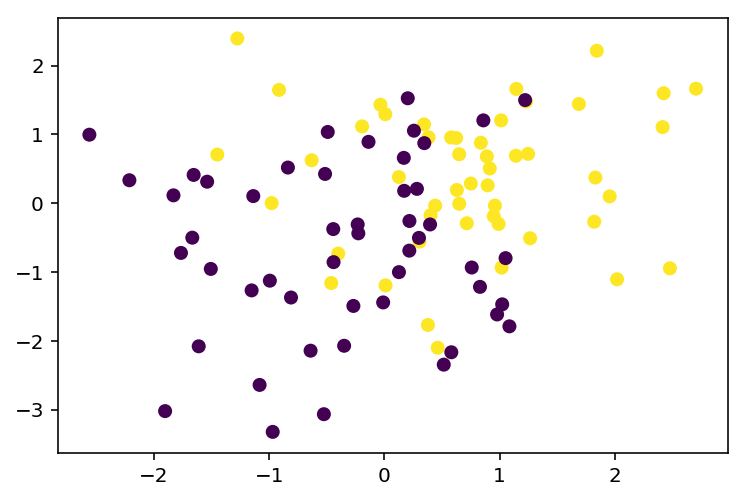

In [243]:
data = ([(np.random.randn(2,1)+0.5,np.ones((1,1))) for _ in range(50)] 
       + [(np.random.randn(2,1)-0.5,np.zeros((1,1))) for _ in range(50)])

x = [p[0][0][0] for p in data]
y = [p[0][1][0] for p in data]
c = [p[1][0][0] for p in data]
plt.scatter(x,y,c=c,cmap='viridis')

In [276]:
new_W, new_b = neuronGD(data, dim_W=2, steps=10, alpha=0.1)

evaluate(data, new_W, new_b)

0.42